## Tensorflow Graph 

In [ ]:
## https://developers.google.com/machine-learning/crash-course/

In [ ]:
a

## Tensorflow Eager Execution

In [ ]:
import os

In [ ]:
import __future__

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.8.0
Eager execution: True


In [2]:
x = [[1], [2], [3]]
y = [[2], [3], [4]]

In [3]:
m = tf.matmul(y, tf.transpose(x))

In [4]:
m

<tf.Tensor: id=10, shape=(3, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 3,  6,  9],
       [ 4,  8, 12]], dtype=int32)>

In [5]:
X = [
     [1, 2, 3], 
     [4, 5, 6], 
     [7, 8, 9], 
     [10, 11, 12]
    ]
# x shape is 4 * 3
# assuming we need convert X to X' which shape is 4 * 5
# then we need a weights 3 * 5

weights = [
    [1, 1, 1], 
    [2, 2, 2], 
    [3, 3, 3]
]

In [6]:
bias = [1, 2, 3]

In [7]:
new_X = tf.matmul(X, weights) + bias

In [8]:
new_X

<tf.Tensor: id=16, shape=(4, 3), dtype=int32, numpy=
array([[15, 16, 17],
       [33, 34, 35],
       [51, 52, 53],
       [69, 70, 71]], dtype=int32)>

In [9]:
w = tf.contrib.eager.Variable([1.0])

In [10]:
with tf.GradientTape() as tape: 
    loss = w * w

In [11]:
grad = tape.gradient(loss, [w])

In [12]:
grad

[<tf.Tensor: id=35, shape=(1,), dtype=float32, numpy=array([ 2.], dtype=float32)>]

<img src='https://www.tensorflow.org/images/opt1.gif'></img>

In [13]:
file_src = '../dataset/'

In [17]:
train_dataset_url = '{}iris_training.csv'.format(file_src)

train_dataset = tf.data.TextLineDataset(train_dataset_url)
train_dataset = train_dataset.skip(1)             # skip the first header row
train_dataset = train_dataset.map(parse_csv)      # parse each row
train_dataset = train_dataset.shuffle(buffer_size=1000)  # randomize
train_dataset = train_dataset.batch(32)

# View a single example entry from a batch
features, label = iter(train_dataset).next()
print("example features:", features[0])
print("example label:", label[0])

example features: tf.Tensor([ 5.80000019  2.5999999   4.          1.20000005], shape=(4,), dtype=float32)
example label: tf.Tensor(1, shape=(), dtype=int32)


In [15]:
def parse_csv(line):
    example_defaults = [[0.], [0.], [0.], [0.], [0]]  # sets field types
    parsed_line = tf.decode_csv(line, example_defaults)
    # First 4 fields are features, combine into single tensor
    features = tf.reshape(parsed_line[:-1], shape=(4,))
    # Last field is the label
    label = tf.reshape(parsed_line[-1], shape=())
    return features, label

In [18]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(3)
])

In [19]:
def loss(model, x, y):
    y_ = model(x)
    return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return tape.gradient(loss_value, model.variables)

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [22]:
# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()

    # Training loop - using batches of 32
    for x, y in train_dataset:
    # Optimize the model
        grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.variables),
                                  global_step=tf.train.get_or_create_global_step())

        # Track progress
        epoch_loss_avg(loss(model, x, y))  # add current batch loss
        # compare predicted label to actual label
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

        # end epoch
        train_loss_results.append(epoch_loss_avg.result())
        train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.013, Accuracy: 53.333%
Epoch 050: Loss: 0.436, Accuracy: 80.000%
Epoch 100: Loss: 0.298, Accuracy: 95.833%
Epoch 150: Loss: 0.201, Accuracy: 96.667%
Epoch 200: Loss: 0.155, Accuracy: 97.500%


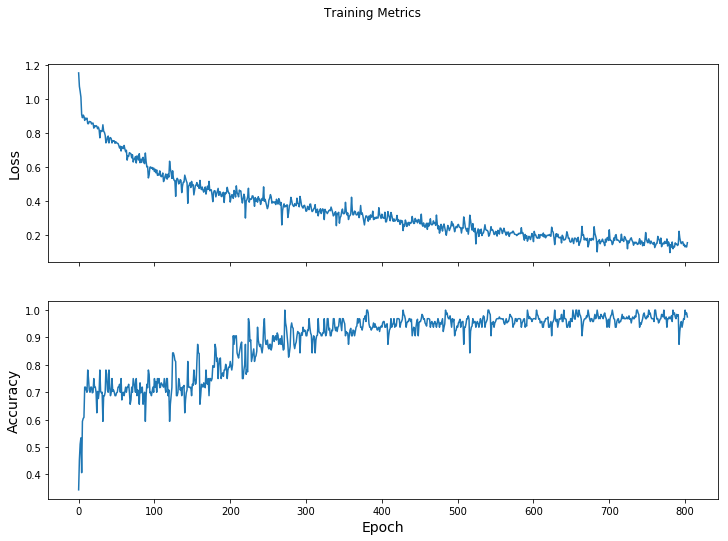

In [23]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

1. tensorflow
    : eager
    : graph
    : estimator
    : self defined function
    : serving
    : distributation

# 改

# 改

## 1.  背景、处理什么问题
## 2.  以前方法缺点， 它怎么牛逼？ 
## 3.  理论基础 理论假设
## 4.  实验如何设计以及如何支持(support ) 作者的假设
## 5.  他这个东西， 对我有什么帮助， 和我有什么关系
## 6.  他说的对吗？ 有没有什么问题？ 